## K Means Clustering
* K-means clustering is an unsupervised algorithm, which means that it makes inferences based on input data, without the need for predefined output labels.
* K-means clustering functions by grouping similar data points together, into clusters, which may reveal patterns. 
* A predefined number of clusters must be provided (k). K-means clustering looks for k clusters in the dataset.
* A cluster is a group of data points aggregated based on similarities, e.g. if 2 sentences contain the word 'great' they may be grouped together.
* The predefined number of clusters (k) lets the algorithm know how many centroids are required. 
* A centroid represents the center of a cluster. It may be real of imaginary. K-means clustering allocates every data point to the nearest cluster.
* K-means clustering initially uses a group of randomly selected centroids.
* Iterative calculations are then used to optimise the positions of the centroids
* K-means clustering is not intelligent. It simply looks for patterns in data to develop clusters.

### Dummy Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans

In [2]:
#dummy dataset, x and y coordinates
x=[1.5,7,2,10,0.5,9.5,3]
y=[3,7,1.7,9,0.3,10,1]

Let's visualise this in a scatter plot. We can see that we have 2 clusters.

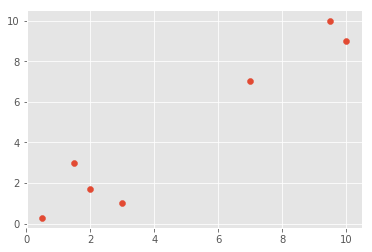

In [3]:
plt.scatter(x,y)

Let's train a k-means clustering model...

In [4]:
array = np.array([[1.5,3],[7,7],[2,1.7],[10,9],[0.5,0.3],[9.5,10],[3,1]])
kmeans = KMeans(n_clusters=2)
kmeans.fit(array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Centroids and Labels
Here are the centroids, in x, y format, as well as the classification of each point

In [5]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("Centroid 1: ",centroids[0],"\nCentroid 2:",centroids[1])
print("\nLabels: ",labels)

Centroid 1:  [8.83333333 8.66666667] 
Centroid 2: [1.75 1.5 ]

Labels:  [1 0 1 0 1 0 1]


#### Visualisation
The x on the graphs denotes the centroids (centroid 1 is bottom left, centroid 2 is top right)

Coordinate:  [1.5 3. ]  label:  1
Coordinate:  [7. 7.]  label:  0
Coordinate:  [2.  1.7]  label:  1
Coordinate:  [10.  9.]  label:  0
Coordinate:  [0.5 0.3]  label:  1
Coordinate:  [ 9.5 10. ]  label:  0
Coordinate:  [3. 1.]  label:  1


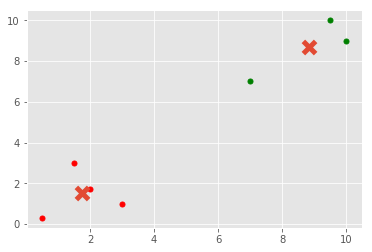

In [6]:
colors = ["g.","r."]

for i in range(len(x)):
    print("Coordinate: ", array[i], " label: ", labels[i])
    plt.plot(array[i][0],array[i][1],colors[labels[i]], markersize=10)
plt.scatter(centroids[:,0],centroids[:,1], marker="x",s=150,linewidth=5,zorder=10)
plt.show()



### A Real Life Example: Sentence Classification

In [116]:
import collections
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [117]:
#function to tokenize text
def tokenizer(text):
    tokens = word_tokenize(text)
    stemmer = PorterStemmer() 
    tokens = [stemmer.stem(t) for t in tokens if t not in stopwords.words('english')]
    return tokens

In [118]:
#function to use k-means clustering to create sentence clusters based on predefined number of clusters
def cluster_sentences(sentences, nb_of_clusters): 
    #uses stopwords to filter out common words
    tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer, stop_words=stopwords.words('english'),lowercase=True)
    tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
    kmeans = KMeans(n_clusters=nb_of_clusters)
    kmeans.fit(tfidf_matrix)
    clusters = collections.defaultdict(list)
    for i, label in enumerate(kmeans.labels_):
        clusters[label].append(i)
    return dict(clusters)

Load our Amazon Fine Foods Reviews dataset. You can find it here: https://www.kaggle.com/snap/amazon-fine-food-reviews 

In [119]:
data = pd.read_csv("./dataset/Reviews.csv")

In [120]:
#preview the dataset
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [122]:
#Let's only consider the Summary feature
data.features = data['Summary']

C:\Users\Andreas Shepley\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


This dataset is huge, so let's just have a look at the first 100 reviews

In [126]:
reviews_subset = data.features[:100]

Let's predefine 10 clusters. Experiment with the number of clusters, and see how generally/specifically you can cluster the reviews.

In [128]:
nclusters= 10
clusters = cluster_sentences(reviews_subset, nclusters)

C:\Users\Andreas Shepley\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Let's check out the results. As you can see, the words are not clustered 'intelligently'. Instead, the algorithm ignores very commonly used words, e.g. 'the' 'if' 'and', and then tries to cluster reviews based on key words, e.g. 'great', 'dog food' etc.

In [129]:
for cluster in range(nclusters):
    print("CLUSTER ",cluster,":")
    for i,sentence in enumerate(clusters[cluster]):
        print("\tSENTENCE ",i,": ",reviews_subset[sentence])



CLUSTER  0 :
	SENTENCE  0 :  poor taste
	SENTENCE  1 :  THIS IS MY TASTE...
	SENTENCE  2 :  Taste is not so good.
	SENTENCE  3 :  Taste great
CLUSTER  1 :
	SENTENCE  0 :  Great Irish oatmeal for those in a hurry!
	SENTENCE  1 :  it's oatmeal
	SENTENCE  2 :  Why wouldn't you buy oatmeal from Mcanns? Tastes great!
	SENTENCE  3 :  Oatmeal For Oatmeal Lovers
	SENTENCE  4 :  Hearty Oatmeal
	SENTENCE  5 :  Very good but next time I won't order the Variety Pack
	SENTENCE  6 :  Don't like it
	SENTENCE  7 :  How much would you pay for a bag of chocolate pretzels?
CLUSTER  2 :
	SENTENCE  0 :  fresh and greasy!
	SENTENCE  1 :  Love it!
	SENTENCE  2 :  Delicious product!
	SENTENCE  3 :  Please sell these in Mexico!!
	SENTENCE  4 :  YUMMY!
	SENTENCE  5 :  Love Gluten Free Oatmeal!!!
	SENTENCE  6 :  HOT!  And good!  Came back for more  :)
	SENTENCE  7 :  Our guests love it!
	SENTENCE  8 :  Awesome Deal!
	SENTENCE  9 :  How can you go wrong!
	SENTENCE  10 :  Awsome - Kids in neighborhood loved us!
	S